In [17]:
import geokit as gk
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt

# Extent
The Extent object represents geographic extents of an area and exposes useful
methods which depend on those extents. Just some examples for the extent object.

Example: Warp the GHI-rasterfile to the area of the extent.

In [18]:
gk.Extent

geokit.core.extent.Extent

In [19]:
# definition of the extent
ext = gk.Extent(6, 50, 6.75, 51.25, srs=gk.srs.EPSG4326)

AxHands(ax=<Axes: >, handles=<matplotlib.image.AxesImage object at 0x0000029AC76F3A90>, cbar=<matplotlib.colorbar.Colorbar object at 0x0000029AC7740880>)

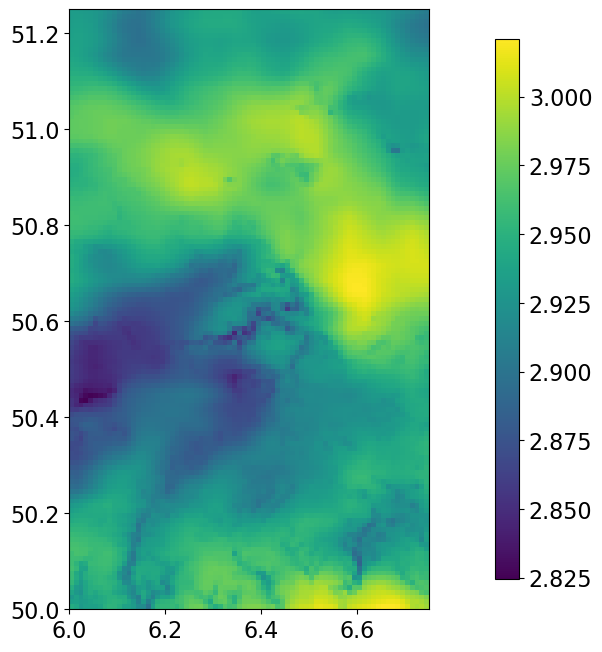

In [20]:
# Clip a raster (GHI tif file) to the area of the extent
clipped_ghi = ext.warp(
    source=gk._test_data_["gsa-ghi-like.tif"],
    resampleAlg="bilinear",
    pixelWidth=0.01,
    pixelHeight=0.01,
)

gk.drawRaster(clipped_ghi, figsize=(6, 6))

Get extent as a geometry object / box.

In [21]:
ext.box

<osgeo.ogr.Geometry; proxy of <Swig Object of type 'OGRGeometryShadow *' at 0x0000029AC76C9770> >

Create two shifted extents, combine and get extent of combined box. 

AxHands(ax=<Axes: >, handles=[<matplotlib.patches.PathPatch object at 0x0000029AC8309FF0>, <matplotlib.patches.PathPatch object at 0x0000029AC830A200>, <matplotlib.patches.PathPatch object at 0x0000029AC830A410>], cbar=None)

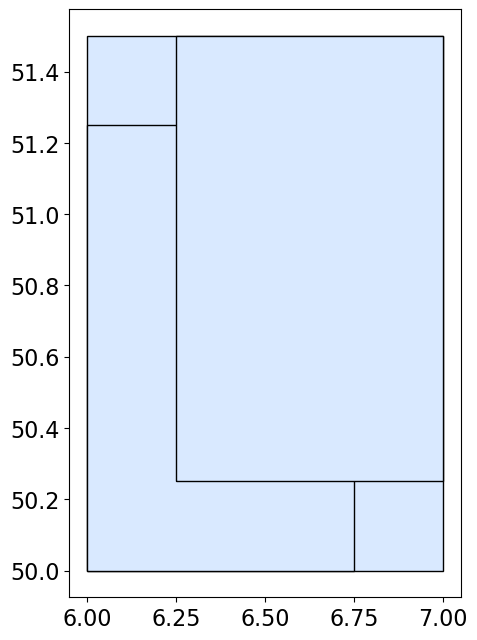

In [22]:
ext = gk.Extent(6, 50, 6.75, 51.25, srs=gk.srs.EPSG4326)
ext2 = gk.Extent(6.25, 50.25, 7, 51.5, srs=gk.srs.EPSG4326)

ext3 = ext + ext2

gk.drawGeoms([ext3.box, ext.box, ext2.box], figsize=(6, 6))

## Get extent of different types

In [23]:
# Get Extent of Raster-File
ext_from_raster = ext.fromRaster(gk._test_data_["gsa-ghi-like.tif"])
ext_from_raster

xMin: 5.500000
xMax: 7.000000
yMin: 50.000000
yMax: 51.500000
srs: GEOGCS["WGS 84",DATUM["WGS_1984",SPHEROID["WGS 84",6378137,298.257223563,AUTHORITY["EPSG","7030"]],AUTHORITY["EPSG","6326"]],PRIMEM["Greenwich",0],UNIT["degree",0.0174532925199433,AUTHORITY["EPSG","9122"]],AXIS["Latitude",NORTH],AXIS["Longitude",EAST],AUTHORITY["EPSG","4326"]]

In [24]:
# Get Extent of Vector-File
ext_from_vector = ext.fromVector(gk._test_data_["Natura2000_aachenClipped.shp"])
ext_from_vector

xMin: 4035461.383400
xMax: 4075451.022500
yMin: 3040668.925200
yMax: 3101715.202400
srs: PROJCS["ETRS89-extended / LAEA Europe",GEOGCS["ETRS89",DATUM["European_Terrestrial_Reference_System_1989",SPHEROID["GRS 1980",6378137,298.257222101,AUTHORITY["EPSG","7019"]],AUTHORITY["EPSG","6258"]],PRIMEM["Greenwich",0,AUTHORITY["EPSG","8901"]],UNIT["degree",0.0174532925199433,AUTHORITY["EPSG","9122"]],AUTHORITY["EPSG","4258"]],PROJECTION["Lambert_Azimuthal_Equal_Area"],PARAMETER["latitude_of_center",52],PARAMETER["longitude_of_center",10],PARAMETER["false_easting",4321000],PARAMETER["false_northing",3210000],UNIT["metre",1,AUTHORITY["EPSG","9001"]],AXIS["Northing",NORTH],AXIS["Easting",EAST],AUTHORITY["EPSG","3035"]]

In [25]:
# Get Extent of a geom
aachen_pt = gk.geom.point((6.083, 52.775), srs=gk.srs.EPSG4326)
aachen_buffered_area = aachen_pt.Buffer(1)
ext_from_geom = ext.fromGeom(aachen_buffered_area)

## Cast to different srs
Creates a new Extent by transforming an extent from the original Extent's
srs to a target SRS.

In [26]:
ext_from_geom.castTo

<bound method Extent.castTo of xMin: 5.083000
xMax: 7.083000
yMin: 51.775000
yMax: 53.775000
srs: GEOGCS["WGS 84",DATUM["WGS_1984",SPHEROID["WGS 84",6378137,298.257223563,AUTHORITY["EPSG","7030"]],AUTHORITY["EPSG","6326"]],PRIMEM["Greenwich",0,AUTHORITY["EPSG","8901"]],UNIT["degree",0.0174532925199433,AUTHORITY["EPSG","9122"]],AXIS["Latitude",NORTH],AXIS["Longitude",EAST],AUTHORITY["EPSG","4326"]]
>

In [27]:
# pad to 2 percent in all directions and fit resoultion of 500m
ext_from_geom.castTo(gk.srs.EPSG3035).pad(2, percent=True).fit(500)

xMin: 3980000.000000
xMax: 4130500.000000
yMin: 3186500.000000
yMax: 3421000.000000
srs: PROJCS["ETRS89-extended / LAEA Europe",GEOGCS["ETRS89",DATUM["European_Terrestrial_Reference_System_1989",SPHEROID["GRS 1980",6378137,298.257222101,AUTHORITY["EPSG","7019"]],AUTHORITY["EPSG","6258"]],PRIMEM["Greenwich",0,AUTHORITY["EPSG","8901"]],UNIT["degree",0.0174532925199433,AUTHORITY["EPSG","9122"]],AUTHORITY["EPSG","4258"]],PROJECTION["Lambert_Azimuthal_Equal_Area"],PARAMETER["latitude_of_center",52],PARAMETER["longitude_of_center",10],PARAMETER["false_easting",4321000],PARAMETER["false_northing",3210000],UNIT["metre",1,AUTHORITY["EPSG","9001"]],AXIS["Northing",NORTH],AXIS["Easting",EAST],AUTHORITY["EPSG","3035"]]

## Filter several files for extent
Pass a list of sources (Vector-files, raster-files) to '.filterSoruces([ ])'. Filter from that list, the the relevant ones that intersect with the extent. 

In [28]:
# Filter sources
ext.filterSources([])

## Get extent boundary in different forms
Get information about the extent geom.

In [29]:
ext.xyXY

(6, 50, 6.75, 51.25)

In [30]:
ext.xXyY

(6, 6.75, 50, 51.25)

## Create raster file for extent

In [31]:
raster_matrix = np.array(
    [
        [1, 2, 3, 1, 2, 3],
        [2, 2, 2, 2, 2, 2],
        [3, 2, 1, 3, 2, 1],
        [3, 2, 1, 3, 2, 1],
        [3, 2, 1, 3, 2, 1],
        [3, 2, 1, 3, 2, 1],
        [3, 2, 1, 3, 2, 1],
    ]
)

ext = gk.Extent([6, 50, 7, 51.5], srs=gk.srs.EPSG4326)
dx, dy = ext.computePixelSize(raster_matrix.shape[1], raster_matrix.shape[0])
ext.createRaster(
    pixelHeight=dy, pixelWidth=dx, data=raster_matrix, output="./test_raster_with_ext.tif"
)

'./test_raster_with_ext.tif'

## Another powerful tool 
Combine raster files in one single file. 

In [32]:
ext.rasterMosaic

<bound method Extent.rasterMosaic of xMin: 6.000000
xMax: 7.000000
yMin: 50.000000
yMax: 51.500000
srs: GEOGCS["WGS 84",DATUM["WGS_1984",SPHEROID["WGS 84",6378137,298.257223563,AUTHORITY["EPSG","7030"]],AUTHORITY["EPSG","6326"]],PRIMEM["Greenwich",0,AUTHORITY["EPSG","8901"]],UNIT["degree",0.0174532925199433,AUTHORITY["EPSG","9122"]],AXIS["Latitude",NORTH],AXIS["Longitude",EAST],AUTHORITY["EPSG","4326"]]
>